<hr style="border-top: 3px solid black"></hr>
<center>
<h1><span style="color:black">Coding a Gradient Descent from Scratch</span></h1>
</center>
<hr style="border-top: 3px solid black"></hr>

# 1°) Without any bias

**Activation function and its derivative:**

*Hyperbolic Tangent:* 

$ \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{\text{sinh}(x)}{\text{cosh}(x)} $

$\text{tanh}'(x) = 1 - \text{tanh}^2(x)  $

**Error function:** 
*The Mean Squared Error*

$\text{MSE}(y_{\text{true}}, y_{\text{pred}}) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred},i} - y_{\text{true},i})^2$

**The gradient descent algorithm:**

First, you initialize some data points with vectors of two elements and their targets and define the wieght ranges that a simple heteroassociator would have to minimize its error using these weights.

Then, you define the activation functions and you compute the global error for each combination of the wieghts $ w_1 , w_2 $. 

One *gradient descent* epoch is as a move picking strategy that explores the error surface by picking the steepest way to minimize the error. It calculates the $\overrightarrow{grad}$ of the function at a given point. The network parameters are then updated based on the $\overrightarrow{grad}$ and a learning rate (sometimes called step size). 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp

In [2]:
# a) patterns
p1 = [0, 0]
p2 = [0, 1]
p3 = [1, 0]
p4 = [1, 1]
p_list = [p1, p2, p3, p4]

# b) targets
t1 = 0.3
t2 = 0.8
t3 = 0.1
t4 = 0.3
target_list = [t1, t2, t3, t4]

input_shape = 2
output_shape = 1
epochs = 300000
lr = 0.01

# defining activation functions
def logistic(x):
    return 1/(1 + np.exp(-x))
def logisticprime(x):
    return logistic(x)*(1-logistic(x))
    
def tanh(x):
    return np.tanh(x)
def tanhprime(x):
    return (1 - np.tanh(x)**2)

def output(activation_function, weighted_sum):
    return activation_function(weighted_sum)

In [3]:
def compute_network_mse(activation_function, w1, w2, p_list, target_list):
    mse_array = np.zeros((len(w1), len(w2)))
    num_patterns = len(p_list)
    for i, wi in enumerate(w1):
        for j, wj in enumerate(w2):
            total_squared_error = 0
            for p_idx, p in enumerate(p_list):
                weighted_sum = p[0] * wi + p[1] * wj
                output_t = output(activation_function, weighted_sum)
                error_t = output_t - target_list[p_idx]
                total_squared_error += error_t ** 2
            mse = total_squared_error / num_patterns
            mse_array[i, j] = mse
    return mse_array

In [4]:
#version sans bias
def initialize_parameters(input_shape, output_shape):
    wlayer1 = np.random.randn(input_shape, output_shape)
    return {'w1': wlayer1}

def mse_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)
    
def fpass(p, parameters, activation_function):
    z1 = np.dot(p, parameters['w1'])
    activation1 = activation_function(z1)
    return {'z1': z1, 'a1': activation1}

def bpass(p, t, parameters, cache, activation_prime):
    dz1 = (cache['a1'] - t) * activation_prime(cache['z1'])
    p_reshaped = p.reshape(-1, 1)  #p doit être un vecteur colonne !!!!!!!!
    dw1 = np.dot(p_reshaped, dz1.reshape(1, -1)) / len(p)
    return {'dw1': dw1}

def delta_rule(parameters, grads, lr=lr):
    parameters['w1'] -= lr * grads['dw1']
    return parameters

In [5]:
def train_with_logging(activation_function, activation_prime, inputs, num_epochs, lr, input_shape, output_shape):
    parameters = initialize_parameters(input_shape, output_shape)
    path = []

    for epoch in range(num_epochs):
        total_squared_error = 0
        for p, t in zip(inputs, target_list):
            cache = fpass(p, parameters, activation_function=activation_function)
            loss = mse_loss(t, cache['a1'])
            total_squared_error += loss
            grads = bpass(p, t, parameters, cache=cache, activation_prime=activation_prime)
            parameters = delta_rule(parameters, grads=grads, lr=lr)
        mse_total = total_squared_error / len(inputs)
        w1, w2 = parameters['w1'][0][0], parameters['w1'][1][0]
        path.append((w1, w2, mse_total))
        if epoch % 200 == 0:
            print("Epoch number:", epoch, "MSE_loss:", mse_total)
        if mse_total < 0.056:
            print("Epoch number:", epoch, "MSE_loss:", mse_total, "Max_loss:", mse_total)
            break

    return parameters, path

In [6]:
inputs = np.array(p_list)
trained_parameters, path = train_with_logging(activation_function=tanh, activation_prime=tanhprime, inputs=inputs, num_epochs=epochs, lr=lr, input_shape=input_shape, output_shape=output_shape)

Epoch number: 0 MSE_loss: 0.32391280166481107
Epoch number: 200 MSE_loss: 0.3152990301251197
Epoch number: 400 MSE_loss: 0.3035626566989649
Epoch number: 600 MSE_loss: 0.2841766652008606
Epoch number: 800 MSE_loss: 0.2469983062086879
Epoch number: 1000 MSE_loss: 0.17423738798953475
Epoch number: 1200 MSE_loss: 0.09029571568386385
Epoch number: 1400 MSE_loss: 0.059161894567733575
Epoch number: 1518 MSE_loss: 0.055991916828556865 Max_loss: 0.055991916828556865


In [7]:
w1, w2 = np.linspace(-6, 6, 300), np.linspace(-6, 6, 300)
errors_logistic = compute_network_mse(logistic, w1,w2, p_list, target_list)
errors_tanh = compute_network_mse(tanh, w1, w2, p_list, target_list)

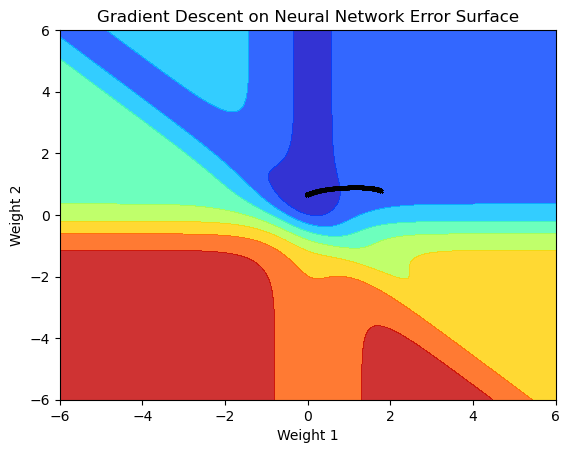

In [8]:
w1_vals, w2_vals, errors = zip(*path)
fig, ax = plt.subplots()
w1_mesh, w2_mesh = np.meshgrid(w1, w2)
contour = ax.contourf(w1_mesh, w2_mesh, errors_tanh.T, cmap='jet', alpha=0.8)
ax.plot(w1_vals, w2_vals, 'k-x', markersize=2)
ax.set_title('Gradient Descent on Neural Network Error Surface')
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
plt.show()

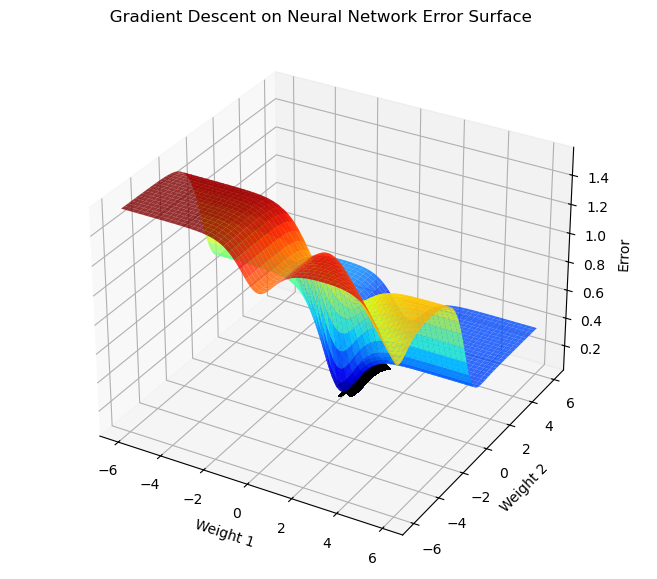

In [9]:
w1_vals, w2_vals, errors = zip(*path)
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111, projection='3d')
w1_mesh, w2_mesh = np.meshgrid(w1, w2)
ax.plot_surface(w1_mesh, w2_mesh, errors_tanh.T, cmap='jet', alpha=0.8)
ax.plot(w1_vals, w2_vals, errors, 'k-x', markersize=8)
ax.set_title('                   Gradient Descent on Neural Network Error Surface                      ')
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Error')
plt.show()